In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/socbiz-analytics/Analytics_Project.xlsx


Credit Card Dataset 

In [3]:
df1=pd.read_excel('/kaggle/input/socbiz-analytics/Analytics_Project.xlsx')

In [4]:
df=pd.DataFrame(df1)

In [5]:
df.head()

,ID,LIMIT_BAL,Gender,Qualification,Married,AGE,PAY0,PAY2,PAY3,PAY4,...,Amount4,Amount5,Amount6,Bill1,Bill2,Bill3,Bill4,Bill5,Bill6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'Gender', 'Qualification', 'Married', 'AGE', 'PAY0',
       'PAY2', 'PAY3', 'PAY4', 'PAY5', 'PAY6', 'Amount1', 'Amount2', 'Amount3',
       'Amount4', 'Amount5', 'Amount6', 'Bill1', 'Bill2', 'Bill3', 'Bill4',
       'Bill5', 'Bill6', 'Default'],
      dtype='object')

In [7]:
df.isnull().sum()

ID               0
LIMIT_BAL        0
Gender           0
Qualification    0
Married          0
AGE              0
PAY0             0
PAY2             0
PAY3             0
PAY4             0
PAY5             0
PAY6             0
Amount1          0
Amount2          0
Amount3          0
Amount4          0
Amount5          0
Amount6          0
Bill1            0
Bill2            0
Bill3            0
Bill4            0
Bill5            0
Bill6            0
Default          0
dtype: int64

In [8]:
df['PAY5'][df['PAY5']==-2].count()

4546

There are 4546 values of outliers with -2, fixing it

The dataset has -2 value in Pay(0,1,2,3,4,5,6) columns which is wrong(since payment for CC bill before 2 months can't be done unless we know the bill amount)
Converting the -2 value to +2

In [9]:
for (index,column) in enumerate(df):
    if (index>5 and index <12):
        for i in range (len(df[column])):
            if(df.loc[i,column]==-2):
                df.loc[i,column]=2
                #df[column].iloc[i]==2

In [10]:
df['PAY5'][df['PAY5']==-2].count()

0

Since values 5 & 6 are unknown qualification therefore combining 6 to 5

Dropping 0 qualification value also

In [11]:
df['Qualification'].value_counts()

Qualification
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [12]:
df=df[df['Qualification']!=0]

In [13]:
df['Qualification'].value_counts()

Qualification
2    14030
1    10585
3     4917
5      280
4      123
6       51
Name: count, dtype: int64

In [14]:
for i in range(len(df)):
    if(df['Qualification'].iloc[i]==6):
        df['Qualification'].iloc[i]=5

In [15]:
df['Qualification'].value_counts()

Qualification
2    14030
1    10585
3     4917
5      331
4      123
Name: count, dtype: int64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**EXPLORATORY DATA ANALYSIS (EDA)**

How much defaults take place?

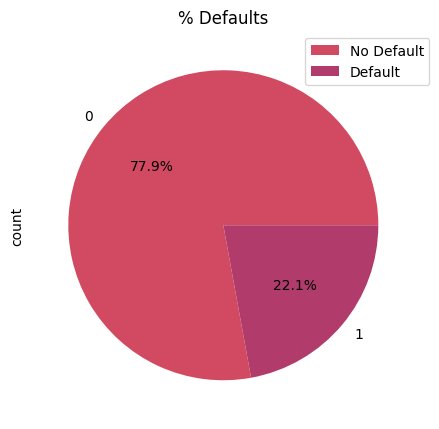

In [17]:
colors=sns.color_palette('flare')[2:5]
ax=df['Default'].value_counts().plot(kind="pie",figsize=(5,6),title="% Defaults",colors=colors,autopct="%1.1f%%")
plt.legend(labels=['No Default','Default'],bbox_to_anchor=(1.05,1))

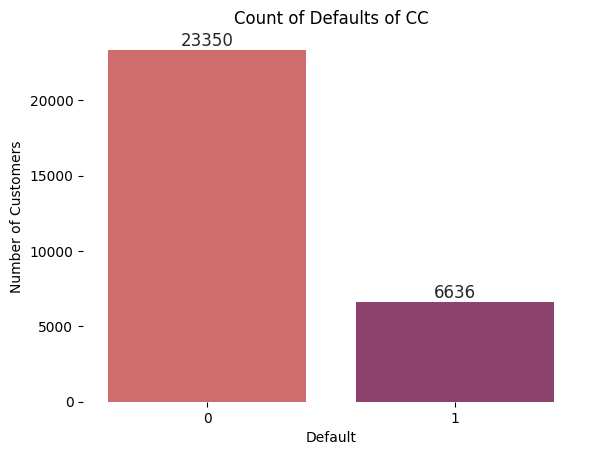

In [18]:
ax=sns.countplot(df,x="Default",palette="flare")
sns.despine(bottom=True,left=True)
#sns.color_palette("flare")
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style('white')
ax.set(title="Count of Defaults of CC")
ax.set_xlabel('Default')
ax.set_ylabel('Number of Customers')
for labels in ax.containers:
    ax.bar_label(labels)

***out of 30,000 customers, 6.6k have defaulted on CC leading to a loss to the company***

***22% of CCs deafult***

**What are the factors affecting the defaults?**

How many percent of men default vs women?

In [19]:
df['Gender'].value_counts()

Gender
2    18106
1    11880
Name: count, dtype: int64

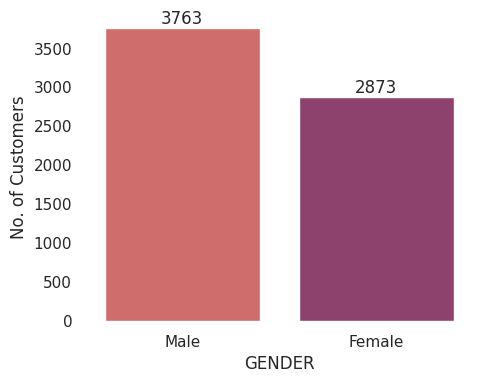

In [20]:
df['Gender'].replace({1,2},{'Male','Female'},inplace=True)
ax=sns.countplot(df[df['Default']==1],x='Gender',palette="flare")
sns.despine(bottom=True,left=True)
ax.set_xlabel('GENDER')
ax.set_ylabel('No. of Customers')
#ax.legend()
for labels in ax.containers:
    ax.bar_label(labels)

The data shows more Females default on CCs more than Male (but the percentage is different) 
* Female--3,763 of 18,112=20.7%
* Male--2,873 of 11888=24.7%

**Gender does not give enough info regarding Defaults**

How does marital status impact deafults?
How does marital status impact sepndings?

In [21]:
df['Married'].value_counts()

Married
2    15954
1    13655
3      323
0       54
Name: count, dtype: int64

In [22]:
df['Married'].value_counts()

Married
2    15954
1    13655
3      323
0       54
Name: count, dtype: int64

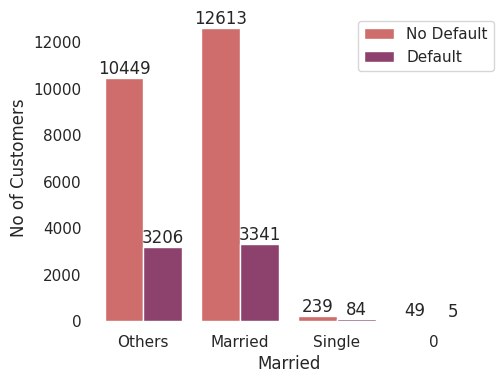

In [23]:
df4=df
df4['Married']=df['Married'].replace({1,2,3},{'Married','Single','Others'})
ax=sns.countplot(df4,x="Married",hue="Default",palette="flare")
sns.despine(bottom=True,left=True)
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style("white")
ax.set_ylabel("No of Customers")
plt.legend(labels=['No Default','Default'],bbox_to_anchor=(1.05,1))
for labels in ax.containers:
    ax.bar_label(labels)

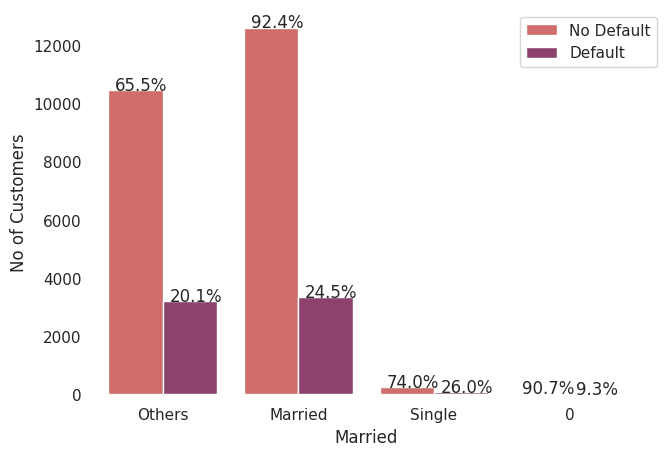

In [24]:
df4=df
df4['Married']=df['Married'].replace({1,2,3},{'Married','Single','Others'})
ax=sns.countplot(df4,x="Married",hue="Default",palette="flare")
sns.despine(bottom=True,left=True)
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style("white")
ax.set_ylabel("No of Customers")
plt.legend(labels=['No Default','Default'],bbox_to_anchor=(1.05,1))

def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
            
with_hue(ax,df['Married'],4,2)

***Customers with Other status of relationship have more chances of defaults.***

****How does age group impact the defaults ?****

Text(0, 0.5, 'No of Customers')

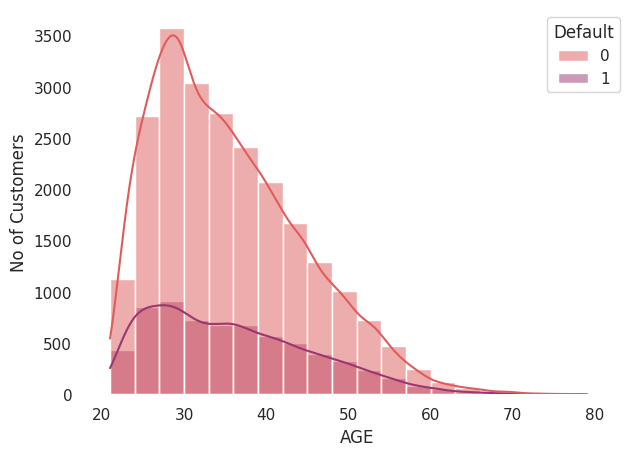

In [25]:
ax=sns.histplot(df,x="AGE",hue="Default",palette="flare",kde=True,binwidth=3)
sns.despine(bottom=True,left=True)
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style("white")
ax.set_ylabel("No of Customers")

The above plot shows that the Age Group of 23-30 are more likely to default on payments

Also,finding out the gender of the the defaulters in age groups

Text(0, 0.5, 'No of Customers')

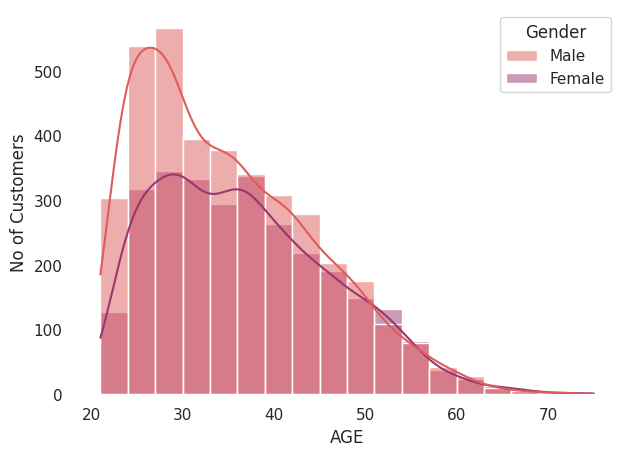

In [26]:
df2=df.loc[df['Default']==1,['AGE','Gender']]
ax=sns.histplot(df2,x="AGE",hue="Gender",palette="flare",kde=True,binwidth=3)
sns.despine(bottom=True,left=True)
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style("white")
ax.set_ylabel("No of Customers")

The above plot has an interesting insight, it shows that out of all defaulters in age group of 23-30 most of them are female.

***Young females tend to default more on their CC Bill***

Which LIMIT category has most defaulters?

[Text(0.5, 1.0, 'Impact of CC limit on Number of Defaults')]

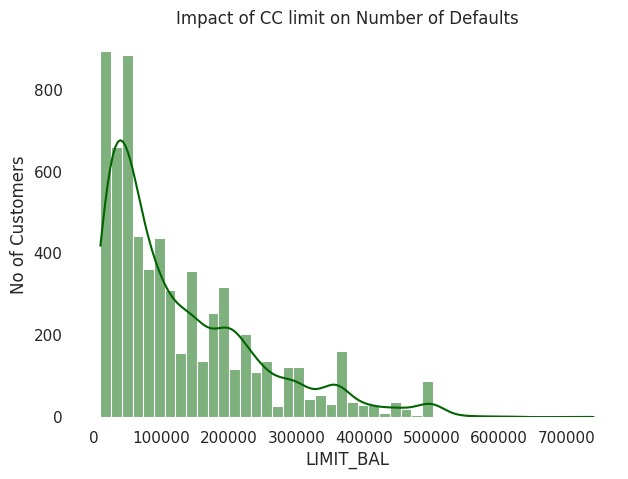

In [27]:
ax=sns.histplot(df.loc[df['Default']==1],x='LIMIT_BAL',color="darkgreen",kde=True)
ax.set_ylabel('No of Customers')
sns.despine(bottom=True,left=True)
ax.set(title="Impact of CC limit on Number of Defaults")

**Customers with CC limit between (0-1lakh) are more prone default on CC payments**

Which age group lies most in the CC limit of 0-100k?

Text(0, 0.5, 'No of Customers')

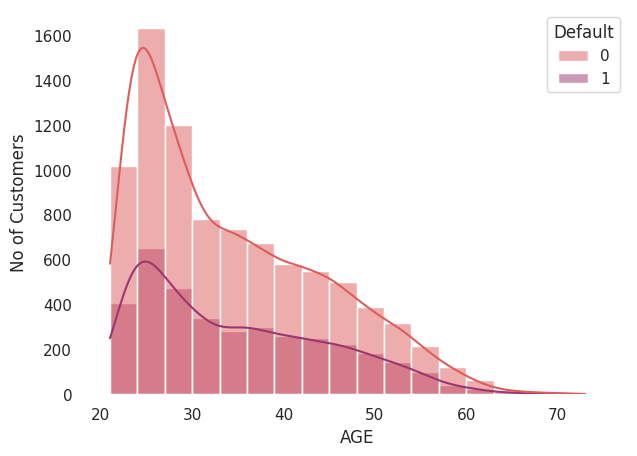

In [28]:
df3=df.loc[df['LIMIT_BAL']<=100000,['AGE','Default']]
ax=sns.histplot(df3,x="AGE",kde=True,hue="Default",palette="flare",binwidth=3)
sns.despine(bottom=True,left=True)
ax.set_ylabel("No of Customers")

***The above plot further shows that Customers with Limit <1lakh among them, age group of 23-30 are the most defaulters.***

What is impact of Qualification on the Defaults?

In [29]:
df['Qualification'].value_counts()

Qualification
2    14030
1    10585
3     4917
5      331
4      123
Name: count, dtype: int64

In [30]:
df5=df
df5['Qualification'].replace({1,2,3,4,5},{'Graduate','University','High School','Other','Unknown'},inplace=True)

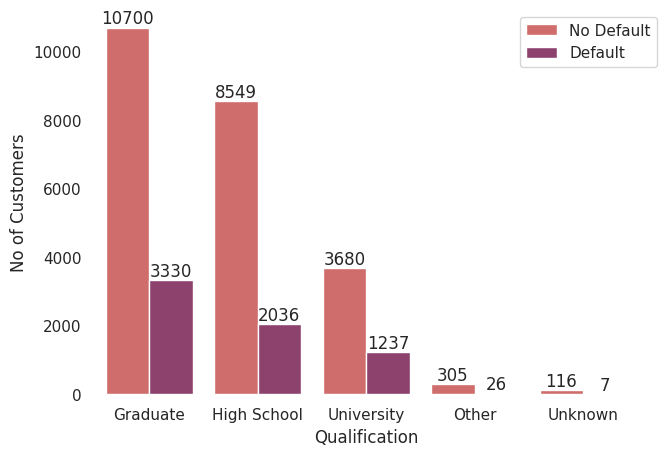

In [31]:
ax=sns.countplot(df5,x="Qualification",hue="Default",palette="flare")
sns.despine(bottom=True,left=True)
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style("white")
ax.set_ylabel("No of Customers")
plt.legend(labels=['No Default','Default'],bbox_to_anchor=(1.05,1))
for labels in ax.containers:
    ax.bar_label(labels)

This trend indicates that 
* 3330/14030 of graduate CC holder default on bill payments-- 23.7%
* 2036/10585 of University CC holder default--- 19.2%
* 1237/4917 Unknown qualification CC holders default--- 25.2%
* 26/331 high school qualification CC holders default---7.8%
* 7/123 Other qualification CC holders default---5.6%

***The above analysis shows that Unknown qualification CC holders 25% are likely to default 1 in every 4 customers***

***Followed by Graduate CC holders with 23.7%***

Impact of qualification
age
CC limit
CC Limit and Total amount used 
marital status vs default
marital status vs spending hue default
pay months left vs marital status and others 
threshold pay month jaha jakar default prob increases



We will be using percent to analyze the defaults

In [32]:
#total spending in each month average of each customer
df['avg_amt']=df[['Bill1','Bill2','Bill3','Bill4','Bill5','Bill6']].mean(axis=1)

In [33]:
df['avg_amt']

0          114.833333
1          833.333333
2         1836.333333
3         1398.000000
4         9841.500000
             ...     
29995     7091.666667
29996     2415.000000
29997     5216.666667
29998    24530.166667
29999     1384.666667
Name: avg_amt, Length: 29986, dtype: float64

In [34]:
df['LIMIT_BAL'].dtype

dtype('int64')

In [35]:
df['LIMIT_BAL']=df['LIMIT_BAL'].astype('int64')

In [36]:
df.loc[df['ID']==114,'LIMIT_BAL']

113    100000
Name: LIMIT_BAL, dtype: int64

Text(0.5, 0, 'Limit of CC')

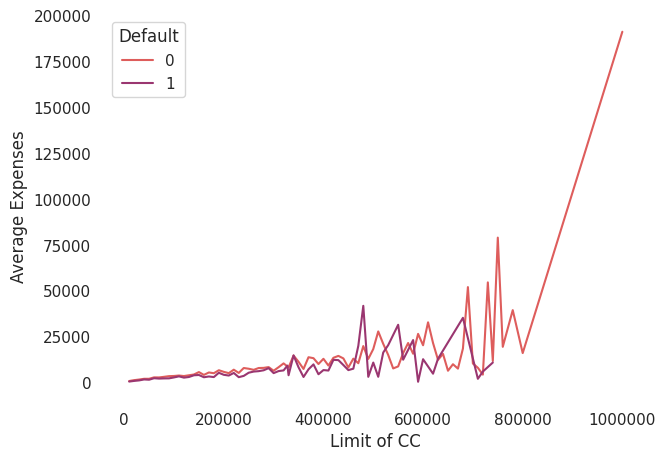

In [37]:
ax=sns.lineplot(df,x="LIMIT_BAL",y="avg_amt",errorbar=None,hue="Default",palette='flare')
sns.despine(bottom=True,left=True)
sns.set(rc={'figure.figsize':(11,4)})
sns.set_style('white')
plt.ticklabel_format(style='plain',axis='x')
ax.set_ylabel('Average Expenses')
ax.set_xlabel('Limit of CC')

The plot shows that the average expense through CC by customers remains less than the CC limit and customers that default on bills spend less on their CC comapred to those who don't

Defaulters are customers with Limit of CC < 80k

What could be the reason for defaulters not spending more?

**At what point of percent usage of available limit do customers tend to default?
What must be the optimum % usage of CC Limit?**

In [38]:
df6=df
df6['Percent usage']=0
df6['avg_use']=df6[['Amount1','Amount2','Amount3','Amount4','Amount5','Amount6']].mean(axis=1)
for i in range(len(df6)):
    value=(df6['avg_use'].iloc[i])*100/(df6['LIMIT_BAL'].iloc[i])
    df6.loc[i,'Percent usage']=value

Text(0, 0.5, 'No of Customers')

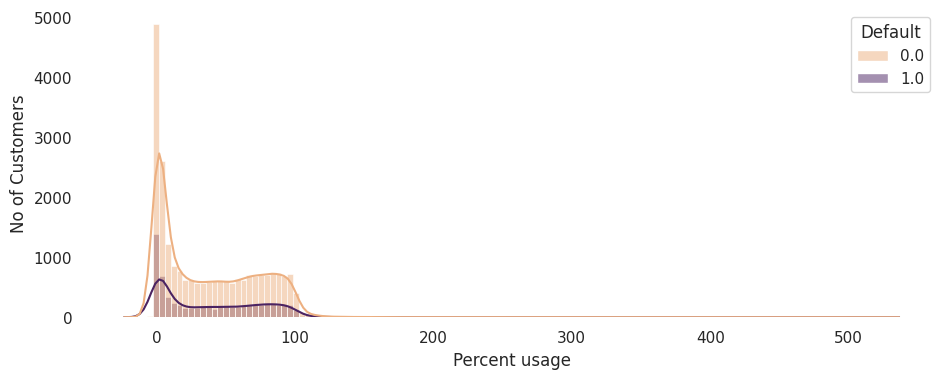

In [39]:
ax=sns.histplot(df6,x="Percent usage",hue="Default",palette="flare",kde=True)
sns.despine(bottom=True,left=True)
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style('white')
ax.set_ylabel("No of Customers")

In [40]:
df6.loc[df6['Percent usage']>100]

,ID,LIMIT_BAL,Gender,Qualification,Married,AGE,PAY0,PAY2,PAY3,PAY4,...,Bill1,Bill2,Bill3,Bill4,Bill5,Bill6,Default,avg_amt,Percent usage,avg_use
189,190.0,20000.0,Male,Graduate,Married,31.0,1.0,5.0,4.0,4.0,...,0.0,1000.0,0.0,0.0,760.0,0.0,0.0,293.333333,104.826667,20965.333333
221,222.0,330000.0,Male,University,Married,45.0,0.0,0.0,0.0,0.0,...,12388.0,12378.0,12116.0,12450.0,12213.0,11678.0,0.0,12203.833333,101.283737,334236.333333
388,389.0,150000.0,Female,Graduate,Others,43.0,0.0,0.0,0.0,0.0,...,7900.0,6500.0,5700.0,5700.0,5700.0,5334.0,0.0,6139.000000,104.899889,157349.833333
395,396.0,140000.0,Male,High School,Married,27.0,0.0,0.0,0.0,0.0,...,10000.0,10000.0,6000.0,6000.0,6000.0,5600.0,0.0,7266.666667,102.183929,143057.500000
404,405.0,160000.0,Male,High School,Married,29.0,2.0,2.0,2.0,2.0,...,7500.0,0.0,11558.0,5800.0,0.0,5654.0,1.0,5085.333333,101.543229,162469.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29882,29883.0,20000.0,Female,University,Married,49.0,0.0,0.0,0.0,2.0,...,2074.0,0.0,0.0,0.0,0.0,0.0,0.0,345.666667,100.307857,5875.166667
29885,29886.0,50000.0,Female,University,Others,39.0,0.0,0.0,0.0,0.0,...,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,1.0,2000.000000,104.890952,45971.666667
29887,29888.0,140000.0,Female,Graduate,Others,34.0,0.0,0.0,0.0,0.0,...,4000.0,5000.0,5000.0,5000.0,5000.0,10000.0,0.0,5666.666667,117.768667,35635.000000
29906,29907.0,150000.0,Female,University,Married,29.0,0.0,0.0,-1.0,-1.0,...,46060.0,81620.0,184133.0,17322.0,3279.0,6222.0,0.0,56439.333333,107.593667,48729.000000


Customers with percent usage greater than 100% means they have delay in the Bill payments of previous months
Ignoring this we move to consider usage between 0 to 100%

Text(0, 0.5, 'No of Customers')

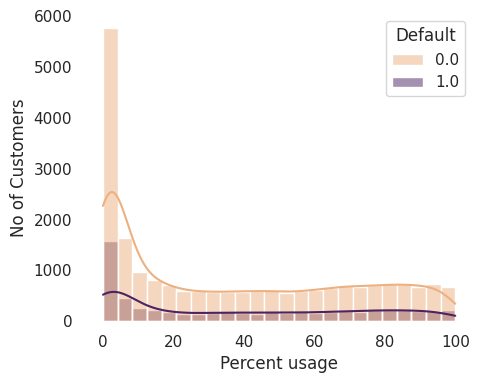

In [41]:
ax=sns.histplot(df6.loc[(df6['Percent usage']<=100) & (df6['Percent usage']>0)],x="Percent usage",hue="Default",palette="flare",kde=True)
sns.despine(bottom=True,left=True)
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style('white')
ax.set_ylabel("No of Customers")

***Customers with less than 20 % usage of their CC bills per month tend to default more ***

In [42]:
#sns.scatterplot(df6,x="",y="Percent usage",hue="Default")

***Checking if the minimum amount to be paid by the customer to sustain their CC is sufficient ?***

for every monthly expense, the bill paid is compared

bill/amount will give money given back to cc per expense by CC in case of Pay 0 for the month is not -1 (not duly paid for the month)

For August

In [43]:
df['aug_min_pay']=0
for i in range(len(df)):
    if(df['Amount2'].iloc[i]!=0):
     value=(df['Bill1'].iloc[i])*100/(df['Amount2'].iloc[i])
    else:
        value=0
    df.loc[i,'aug_min_pay']=value

In [44]:
df['pct_usage']=df6['Percent usage']

In [45]:
df['aug_min_pay'].value_counts()

aug_min_pay
 0.000000      5285
 100.000000    4060
 200.000000      33
-100.000000      29
 50.000000       16
               ... 
 27.618206        1
 20.769510        1
 61.529418        1
 100.817439       1
 10.740418        1
Name: count, Length: 20283, dtype: int64

In [46]:
df7=df.loc[(df['aug_min_pay']<101)&(df['aug_min_pay']>0),['aug_min_pay','Default']]
df7

,aug_min_pay,Default
2,10.821986,0.0
3,4.146539,0.0
4,35.273369,0.0
5,4.380662,0.0
6,13.348769,0.0
...,...,...
20030,100.000000,NaN
23234,100.000000,NaN
24137,47.487891,NaN
27155,10.740418,NaN


In [47]:
df8=pd.DataFrame(df7)

In [48]:
df8

,aug_min_pay,Default
2,10.821986,0.0
3,4.146539,0.0
4,35.273369,0.0
5,4.380662,0.0
6,13.348769,0.0
...,...,...
20030,100.000000,NaN
23234,100.000000,NaN
24137,47.487891,NaN
27155,10.740418,NaN


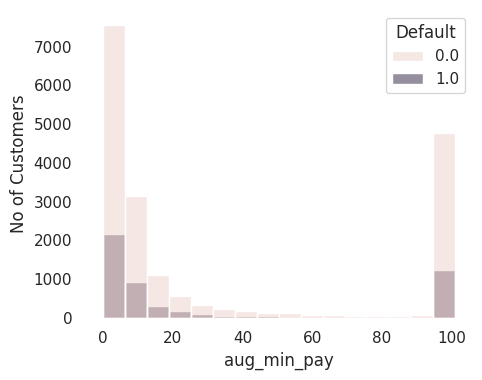

In [49]:
ax=sns.histplot(df8,x='aug_min_pay',hue="Default")
ax.set_ylabel("No of Customers")
sns.despine(bottom=True,left=True)

The above plot shows that for August defaults, customers with payment of less than 20% of the bill of CC tend to default more than others.

Devising strategy to set a threshold payment to be done for each month's bill might reduce defaults.

Customers who paid min amount of xx percent of the total bill for August, defaulted, Instead we should look at changing the policy of minimum payment for different amount of Bill to avoid more defaults.

In [50]:
data1=pd.read_excel('/kaggle/input/socbiz-analytics/Analytics_Project.xlsx')
data=pd.DataFrame(data1)

In [51]:
for (index,column) in enumerate(data):
    if (index>5 and index <12):
        for i in range (len(data[column])):
            if(data.loc[i,column]==-2):
                data.loc[i,column]=2
                #df[column].iloc[i]==2

In [52]:
data=data[data['Qualification']!=0]

# Using ML Models to predict default of a Customer's CC 

**We have to first find factors impacting the default of Credit Card payments by customers**

**We will be using correlation to find relation among various features!**

**Also, our dataset has class imbalance so we will be dealing with it.**

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix

In [54]:
df['Default'].value_counts()

Default
0.0    23350
1.0     6636
Name: count, dtype: int64

.values return a numpy array, so to continue with dataframe of X as train and test, we remove that

In [55]:
x=data.iloc[:,:-1]
y=data['Default']

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

Using SMOTHE Algorithm to balance the dataset

In [57]:
!pip install imbalanced-learn

In [58]:
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=2)
x_resampled,y_resampled=smt.fit_resample(x,y)

In [59]:
x_train_smt,x_test_smt,y_train_smt,y_test_smt=train_test_split(x_resampled,y_resampled,random_state=42,test_size=0.3)

In [60]:
x_train_smt

,ID,LIMIT_BAL,Gender,Qualification,Married,AGE,PAY0,PAY2,PAY3,PAY4,...,Amount3,Amount4,Amount5,Amount6,Bill1,Bill2,Bill3,Bill4,Bill5,Bill6
45834,1498,100000,1,2,1,40,1,2,0,0,...,16009,16794,16635,17160,387,1123,1261,208,910,1291
4915,4917,360000,2,1,1,32,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
38785,21253,50000,1,2,2,28,2,2,2,2,...,37270,37949,37212,38214,1987,1800,1587,171,1754,1771
19490,19499,180000,2,1,2,46,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
18523,18532,200000,2,2,1,27,-1,-1,-1,-1,...,5865,1303,4579,1107,3670,5865,1303,4579,1107,2109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,11288,360000,1,2,1,32,0,0,0,-1,...,8217,2963,15437,15722,5017,2041,2980,16038,8032,10095
44732,8107,300000,1,1,2,29,1,2,2,2,...,0,0,0,0,0,0,0,0,0,0
38158,11722,10000,1,1,2,41,0,0,0,0,...,8915,9092,9301,9469,1140,1136,314,343,329,222
860,861,50000,1,1,2,26,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0


Feature Selection- choosing important features from dataset which affect output most since they impact the ML model algorithm

* Reduce Overfitting
* Improve accuracy


I will be using 3 methods for feature selection:
* Univariate Selection
* Feature Importance 
* Correlation Heatmap

**Univariate Selection Method**

We have to decide which statistics to use with SelectKBest 

Since, our independent variables are numerics and numeric categories and the target variable(default) is also numeric, we will use Correlation

In [61]:
#using scikit SelectKBest library for categorical data 

from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import f_classif

Since we have negative values in some columns that is important, we will be using other Feature selection techique --- ANOVA F-value

In [62]:
select_feature=SelectKBest(f_classif,k=10)
select_feature.fit(x_train_smt,y_train_smt)

SelectKBest()

In [63]:
x_train_smt.shape

(32690, 24)

In [64]:
selected_features_df = pd.DataFrame({'Feature':list(x_train_smt.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
6,PAY0,2436.326083
7,PAY2,1993.725674
2,Gender,1613.810845
4,Married,1487.281985
8,PAY3,1453.173021
9,PAY4,1231.835574
1,LIMIT_BAL,1193.418191
10,PAY5,1068.191732
11,PAY6,841.438727
18,Bill1,402.036314


**The above analysis of F-test statistics using ANOVA (ANalysis Of VAriance) technique of Feature selection using SelectKBest library of Sklearn**

In [65]:
x_train_smt_Kbest=select_feature.transform(x_train_smt)
x_test_smt_Kbest=select_feature.transform(x_test_smt)

In [66]:
#k=10 features have been choosen for prediction 

x_train_smt_Kbest.shape

(32690, 10)

K=16 seems to be a good choice for feature selection so working again

In [67]:
select_feature=SelectKBest(f_classif,k=16)
select_feature.fit(x_train_smt,y_train_smt)

x_train_smt_Kbest16=select_feature.transform(x_train_smt)
x_test_smt_Kbest16=select_feature.transform(x_test_smt)

In [68]:
x_train_smt_Kbest16.shape

(32690, 16)

Heatmap for correlation

In [69]:
corr_var=data.corr()
corr_var

,ID,LIMIT_BAL,Gender,Qualification,Married,AGE,PAY0,PAY2,PAY3,PAY4,...,Amount4,Amount5,Amount6,Bill1,Bill2,Bill3,Bill4,Bill5,Bill6,Default
ID,1.000000,0.026278,0.018574,0.039499,-0.028910,0.018653,0.027331,0.017840,0.013459,0.029072,...,0.040412,0.016784,0.016786,0.009779,0.008515,0.039157,0.007863,0.000657,0.003008,-0.013895
LIMIT_BAL,0.026278,1.000000,0.024810,-0.219052,-0.108323,0.144665,-0.065352,-0.081498,-0.082363,-0.071024,...,0.294124,0.295728,0.290580,0.195217,0.178268,0.210065,0.203238,0.217253,0.219666,-0.153455
Gender,0.018574,0.024810,1.000000,0.013861,-0.031314,-0.090925,-0.003779,-0.009649,-0.005580,-0.010814,...,-0.021966,-0.017114,-0.016869,-0.000165,-0.001342,-0.008500,-0.002225,-0.001724,-0.002790,-0.040063
Qualification,0.039499,-0.219052,0.013861,1.000000,-0.143336,0.175716,0.041480,0.027954,0.012931,0.007752,...,-0.000962,-0.008170,-0.009730,-0.037487,-0.029746,-0.039774,-0.038353,-0.040573,-0.037385,0.027460
Married,-0.028910,-0.108323,-0.031314,-0.143336,1.000000,-0.414362,-0.013785,-0.013381,-0.010600,-0.013389,...,-0.023247,-0.025306,-0.021102,-0.006031,-0.008206,-0.003544,-0.012698,-0.001192,-0.006612,-0.024268
AGE,0.018653,0.144665,-0.090925,0.175716,-0.414362,1.000000,0.014026,0.009678,0.008462,0.014701,...,0.051455,0.049465,0.047713,0.026214,0.021633,0.029233,0.021450,0.022863,0.019479,0.013984
PAY0,0.027331,-0.065352,-0.003779,0.041480,-0.013785,0.014026,1.000000,0.747544,0.577521,0.525531,...,0.008448,0.017572,0.019334,-0.066507,-0.039593,-0.055580,-0.038568,-0.032467,-0.034658,0.268155
PAY2,0.017840,-0.081498,-0.009649,0.027954,-0.013381,0.009678,0.747544,1.000000,0.676989,0.554257,...,-0.019482,-0.009422,-0.005472,-0.135125,-0.058836,-0.072188,-0.047412,-0.046584,-0.051711,0.234497
PAY3,0.013459,-0.082363,-0.005580,0.012931,-0.010600,0.008462,0.577521,0.676989,1.000000,0.696379,...,-0.046402,-0.035681,-0.029978,-0.066500,-0.117545,-0.078014,-0.055474,-0.052816,-0.054973,0.204370
PAY4,0.029072,-0.071024,-0.010814,0.007752,-0.013389,0.014701,0.525531,0.554257,0.696379,1.000000,...,-0.063612,-0.053506,-0.046423,-0.071274,-0.059719,-0.136829,-0.075740,-0.060610,-0.052202,0.187984


<Axes: >

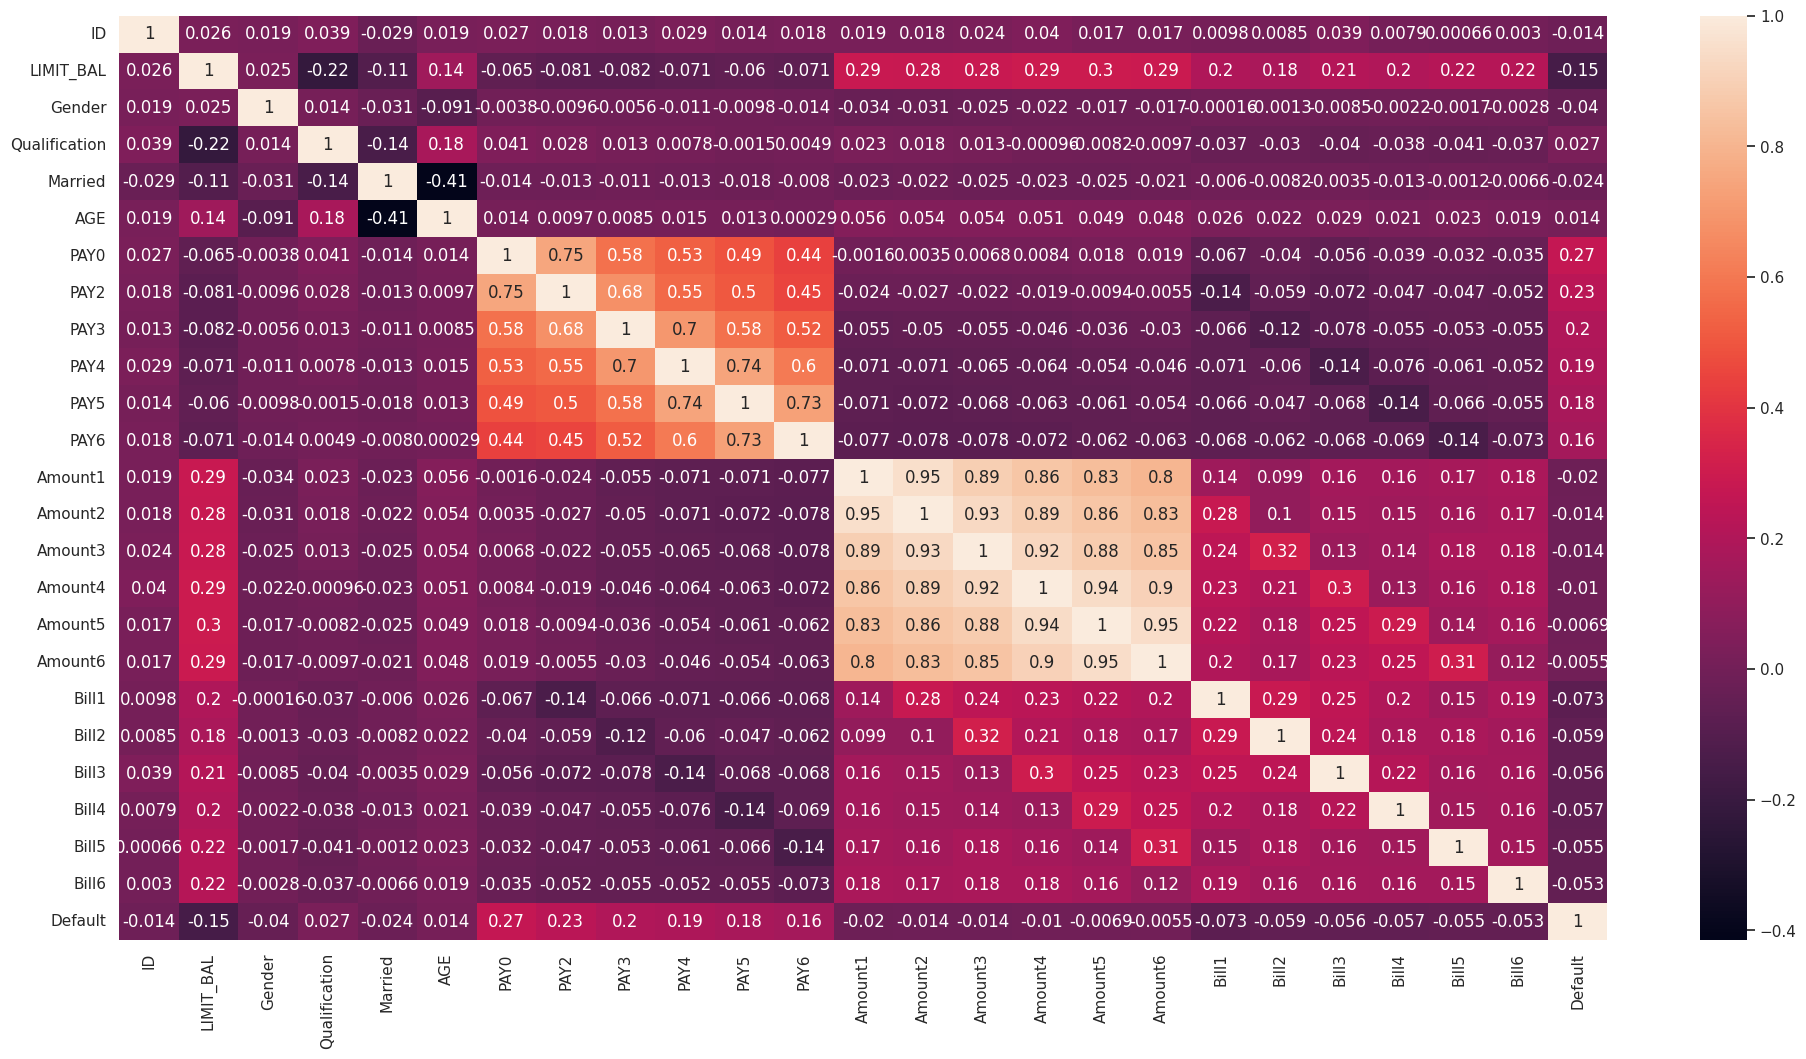

In [70]:
sns.set(rc={'figure.figsize':(24,12)})
sns.heatmap(corr_var,annot=True)

**Now, moving on to ML Model for prediction of Deafulters**

Since it is a binatry classification, we will be using following methods:
* Logistic Regression
* SVM (Support Vector Machine)
* 

**Logistic Regression Model Prediction & Analysis**

In [71]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_smt_Kbest16,y_train_smt)

LogisticRegression()

In [72]:
prediction_lr=lr.predict(x_test_smt_Kbest16)

In [73]:
prediction_lr

array([1, 0, 0, ..., 1, 1, 1])

**Accuracy and other metrics**

In [74]:
accuracy_lr=accuracy_score(prediction_lr,y_test_smt)

In [75]:
print("The accuracy of the Logistic Regression model is ", accuracy_lr*100,"%")

The accuracy of the Logistic Regression model is  65.32476802284083 %


**Confusion matrix and TP, FN**

In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [77]:
cm_lr=confusion_matrix(y_test_smt,prediction_lr)

In [78]:
cm_lr

array([[4638, 2406],
       [2452, 4514]])

The matrix shows that 

In [79]:
import sklearn.metrics as metrics
report=metrics.classification_report(y_test_smt,prediction_lr)
print(report)

              precision    recall  f1-score   support

           0       0.65      0.66      0.66      7044
           1       0.65      0.65      0.65      6966

    accuracy                           0.65     14010
   macro avg       0.65      0.65      0.65     14010
weighted avg       0.65      0.65      0.65     14010



From the above Classification Report we can see various factors 

We will be discussing these:

* Precision--

**Random Forest Algorithm**

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train_smt_Kbest16,y_train_smt)

RandomForestClassifier()

In [81]:
prediction_rfc=rfc.predict(x_test_smt_Kbest16)

In [82]:
accuracy_rfc=accuracy_score(y_test_smt,prediction_rfc)
print("The Accuracy of Random Forest Classifier is ",accuracy_rfc*100,"%")

The Accuracy of Random Forest Classifier is  82.01998572448251 %


In [83]:
cm_rfc=confusion_matrix(y_test_smt,prediction_rfc)
cm_rfc

array([[6038, 1006],
       [1513, 5453]])

In [84]:
report_rfc=metrics.classification_report(y_test_smt,prediction_rfc)
print(report_rfc)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      7044
           1       0.84      0.78      0.81      6966

    accuracy                           0.82     14010
   macro avg       0.82      0.82      0.82     14010
weighted avg       0.82      0.82      0.82     14010



**KNN (K-Nearest Neighbour) algorithm**

**Naive Bayes**

In [85]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train_smt_Kbest16,y_train_smt)

GaussianNB()

In [86]:
prediction_nb=nb.predict(x_test_smt_Kbest16)
accuracy_nb=accuracy_score(y_test_smt,prediction_nb)
print("The Accuracy of Navie Bayes model is ",accuracy_nb*100,"%")

## CONFUSION MATRIX
print("-------------------------------")
cm_nb=confusion_matrix(y_test_smt,prediction_nb)
print(cm_nb)
print("-------------------------------")
## Classification Report
report_nb=metrics.classification_report(y_test_smt,prediction_nb)
print(report_nb)

The Accuracy of Navie Bayes model is  54.57530335474661 %
-------------------------------
[[1052 5992]
 [ 372 6594]]
-------------------------------
              precision    recall  f1-score   support

           0       0.74      0.15      0.25      7044
           1       0.52      0.95      0.67      6966

    accuracy                           0.55     14010
   macro avg       0.63      0.55      0.46     14010
weighted avg       0.63      0.55      0.46     14010



**Decision Tree**

In [87]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train_smt_Kbest16,y_train_smt)

prediction_dtc=dtc.predict(x_test_smt_Kbest16)
accuracy_dtc=accuracy_score(y_test_smt,prediction_dtc)
print("The Accuracy of Decision Tree Classifier model is ",accuracy_dtc*100,"%")

## CONFUSION MATRIX
print("-------------------------------")
cm_dtc=confusion_matrix(y_test_smt,prediction_dtc)
print(cm_dtc)
print("-------------------------------")
## Classification Report
report_dtc=metrics.classification_report(y_test_smt,prediction_dtc)
print(report_dtc)

The Accuracy of Decision Tree Classifier model is  74.1541755888651 %
-------------------------------
[[5166 1878]
 [1743 5223]]
-------------------------------
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      7044
           1       0.74      0.75      0.74      6966

    accuracy                           0.74     14010
   macro avg       0.74      0.74      0.74     14010
weighted avg       0.74      0.74      0.74     14010



**XGBoost**

In [88]:
import xgboost as xgb

In [89]:
xgb_train=xgb.DMatrix(x_train_smt_Kbest16,y_train_smt,enable_categorical=True)
xgb_test=xgb.DMatrix(x_test_smt_Kbest16,y_test_smt,enable_categorical=True)

In [90]:
n=50
params={
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
}
xg=xgb.train(params=params,dtrain=xgb_train,num_boost_round=n)

In [91]:
prediction_xgb=xg.predict(xgb_test)
prediction_xgb=prediction_xgb.astype(int)

In [92]:
accuracy_xgb=accuracy_score(y_test_smt,prediction_xgb)
print("The Accuracy of XGBoost model on Decision Tree is ",accuracy_xgb*100,"%")

## CONFUSION MATRIX
print("-------------------------------")
cm_xgb=confusion_matrix(y_test_smt,prediction_xgb)
print(cm_xgb)
print("-------------------------------")
## Classification Report
report_xgb=metrics.classification_report(y_test_smt,prediction_xgb)
print(report_xgb)

The Accuracy of XGBoost model on Decision Tree is  50.27837259100642 %
-------------------------------
[[7044    0]
 [6966    0]]
-------------------------------
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7044
           1       0.00      0.00      0.00      6966

    accuracy                           0.50     14010
   macro avg       0.25      0.50      0.33     14010
weighted avg       0.25      0.50      0.34     14010



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We will be saving the ML models that we have trained

In [93]:
import pickle
pickle.dump(lr,open('lr_model.pkl','wb'))
pickle.dump(rfc,open('rfc_model.pkl','wb'))
pickle.dump(nb,open('nb_model.pkl','wb'))
pickle.dump(dtc,open('dct_model.pkl','wb'))
pickle.dump(xg,open('xgBoost_model.pkl','wb'))

In [94]:
!pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/d3/96/9251b421d0a1c7d625a82a04bea56b8a9830c785940ec16db454b85c6db7/streamlit-1.29.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for validators<1,>=0.2 from https://files.pythonhosted.org/packages/3a/0c/785d317eea99c3739821718f118c70537639aa43f96bfa1d83a71f68eaf6/validators-0.22.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 41.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 98.1 MB/s eta 0:00:00:00:0100:01


In [95]:
import streamlit as st

#loading the saved models

lr=pickle.load(open('/kaggle/working/lr_model.pkl','rb'))
rfc=pickle.load(open('/kaggle/working/rfc_model.pkl','rb'))
nb=pickle.load(open('/kaggle/working/nb_model.pkl','rb'))
dtc=pickle.load(open('/kaggle/working/dct_model.pkl','rb'))
xg=pickle.load(open('/kaggle/working/xgBoost_model.pkl','rb'))

In [100]:
selected_features_df.sort_values(by='Scores', ascending=False)[:16]['Feature']

6              PAY0
7              PAY2
2            Gender
4           Married
8              PAY3
9              PAY4
1         LIMIT_BAL
10             PAY5
11             PAY6
18            Bill1
3     Qualification
20            Bill3
22            Bill5
19            Bill2
23            Bill6
21            Bill4
Name: Feature, dtype: object

***Now, that we have analyzed some algorithms for Default prediction, we will create a simple interface for interacting with a web application to predict Default of any CC holder***

**Streamlit**

In [138]:
%%writefile app.py
import streamlit as st
import pickle
st.set_page_config(
       page_title="Customer CC Default Prediction",
       page_icon="🧑‍💼"
)

st.title("Customer CC Default Prediction!")
lr=pickle.load(open('/kaggle/working/lr_model.pkl','rb'))
rfc=pickle.load(open('/kaggle/working/rfc_model.pkl','rb'))
nb=pickle.load(open('/kaggle/working/nb_model.pkl','rb'))
dtc=pickle.load(open('/kaggle/working/dct_model.pkl','rb'))
xg=pickle.load(open('/kaggle/working/xgBoost_model.pkl','rb'))

def main():
    st.markdown(" CC Default Predictor", unsafe_allow_html=True)
    st.markdown("Drop in The required Inputs and we will do the rest.", unsafe_allow_html=True)
    st.sidebar.header("This is a Demo web application for project of Analytics-SocBiz,IITR")

#taking input buttons

name=st.text_input("Name of Customer")
age=st.number_input("Age of Customer")
Gender=st.selectbox("Gender (1- Male 2--Female)",[1,2])
Married=st.selectbox("Marital Status (1--Married 2--Single 3--Others)",[1,2,3])
Qualification=st.selectbox("Qualification 1--Graduate 2--University 3--High school 4-Other 5-Unknown",[1,2,3,4,5])
pay0=st.radio("Repayment Status in September 2005 ",(-1,2,3,4,5,6,7,8))
pay2=st.radio("Repayment Status in August 2005",(-1,2,3,4,5,6,7,8))
PAY3=st.radio("Repayment Status in July 2005",(-1,2,3,4,5,6,7,8))
PAY4=st.radio("Repayment Status in June 2005",(-1,2,3,4,5,6,7,8))
PAY5=st.radio("Repayment Status in May 2005",(-1,2,3,4,5,6,7,8))
PAY6=st.radio("Repayment Status in April 2005",(-1,2,3,4,5,6,7,8))
LIMIT_BAL=st.number_input("Limit of CC")
Bill1=st.number_input("Amount of previous payment in September 2005")
Bill2=st.number_input("Amount of previous payment in August 2005")
Bill3=st.number_input("Amount of previous payment in July 2005")
Bill4=st.number_input("Amount of previous payment in June 2005")
Bill5=st.number_input("Amount of previous payment in May 2005")
Bill6=st.number_input("Amount of previous payment in April 2005")
inputs=[[pay0,pay2,Gender,Married,PAY3,PAY4,LIMIT_BAL,PAY5,PAY6,
         Bill1,Qualification,Bill3,Bill5,Bill2,Bill6,Bill4]]

if st.button('Predict CC Default !'):
    result=lr.predict(inputs)
    updated_res = result.flatten().astype(float)
    if (updated_res==[1]):
     st.success("The LogisticRegression model predicts that Customer will : Default on the CC ")
    else:
     st.success("The LogisticRegression model predicts that Customer will : NOT Default ")

if __name__=="__main__":
    main()

Overwriting app.py


In [139]:
!pip install pyngrok

0

In [140]:
from pyngrok import ngrok
!ngrok authtoken 2a9zDWjUmMAxFaA2tr6LcMIlnZW_7ziy7WCdhtrPkdbsvCBz3

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


0

In [141]:
get_ipython().system = os.system

In [142]:
!nohup streamlit run /kaggle/working/app.py &

0

In [143]:
url=ngrok.connect(8080)
url

<NgrokTunnel: "https://d4d4-34-75-17-168.ngrok-free.app" -> "http://localhost:8080">

In [ ]:
!streamlit run --server.port 8080 /kaggle/working/app.py >/dev/null




  You can now view your Streamlit app in your browser.

  Network URL: http://172.19.2.2:8501
  External URL: http://34.75.17.168:8501

